## 1. Vector, Matrix, Tensor

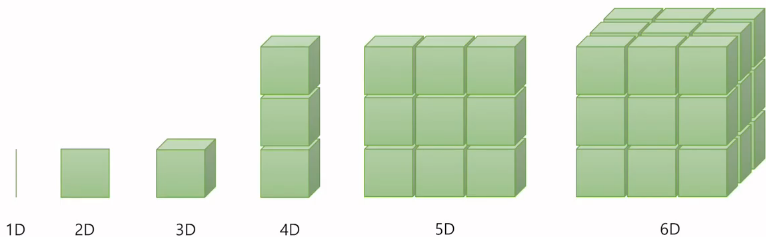

보통 1차원으로 구성된 값을 우리는 벡터, 2차원으로 구성된 값을 행렬, 그리고 3차원이 되면 텐서라고 부른다.

In [2]:
import torch

#### 1D with PyTorch

In [3]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [4]:
print(t.dim())     # rank
print(t.shape)     # shape

1
torch.Size([7])


In [5]:
print(t[0])      # indexing
print(t[2:5])    # slicing

tensor(0.)
tensor([2., 3., 4.])


#### 2D with PyTorch

In [6]:
t = torch.FloatTensor([[1., 2., 3.],
                      [4., 5., 6.],
                      [7., 8., 9.],
                      [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [7]:
print(t.dim())
print(t.shape)

2
torch.Size([4, 3])


In [8]:
print(t[:, 1])       # 두 번째 차원의 첫번째 것만 가져온다

tensor([ 2.,  5.,  8., 11.])


In [11]:
print(t[:, :-1])       # == print(t[:, :2]). 첫번째 차원 전체 선택한 후 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


#### Broadcasting

In [4]:
m1 = torch.FloatTensor([[3,3]])
m2 = torch.FloatTensor([2])
print(m1 + m2)

tensor([[5., 5.]])


In [6]:
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([[3],[4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


#### Multiplication

In [8]:
m1 = torch.FloatTensor([[1,2],[3,4]])    # 2x2
m2 = torch.FloatTensor([[1],[2]])        # 2x1
print(m1 * m2)
print(m1.mul(m2))
print(m1.matmul(m2))

tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[ 5.],
        [11.]])


#### Mean

In [10]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [12]:
# 4개의 원소의 평균값
print(t.mean())

tensor(2.5000)


In [13]:
# 행 제거 (1x2)
print(t.mean(dim=0))

tensor([2., 3.])


In [14]:
# 열 제거 (2x1)
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [16]:
# 마지막 차원 제거 (여기서는 열)
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


#### Sum

In [17]:
t = torch.FloatTensor([[1,2],[3,4]])

In [18]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


#### Max & ArgMax

- Max는 원소의 최댓값을 리턴
- ArgMax는 최댓값을 가진 인덱스 리턴

In [20]:
t = torch.FloatTensor([[1,2],[3,4]])

In [22]:
print(t.max())    # return max

tensor(4.)


In [23]:
print(t.max(dim=0))     #return max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


#### View

- Numpy에서 reshape와 같다. 텐서의 크기를 변경해준다.

In [26]:
t = torch.FloatTensor([[[0,1,2],
                         [3,4,5],
                         [6,7,8],
                         [9,10,11]]])

In [27]:
print(t.shape)

torch.Size([1, 4, 3])


In [29]:
print(t.view([-1,3]))    # 텐서 t 를 (?,3) 크기로 변결
print(t.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


#### Squeeze

- 1인 차원 제거

In [30]:
t = torch.FloatTensor([[0], [1], [2]])
print(t.shape)

torch.Size([3, 1])


In [31]:
print(t.squeeze().shape)

torch.Size([3])


##### Unsqueeze

- 특정 위치에 1인 차원 추가

In [32]:
t = torch.FloatTensor([0,1,2])
print(t.shape)

torch.Size([3])


In [34]:
print(t.unsqueeze(0))
print(t.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [35]:
print(t.unsqueeze(-1))
print(t.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


#### Concatenate

- 두 텐서를 연결. 어느 차원을 늘릴지 인자를 줄 수 있다

In [36]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [37]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [38]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


#### Stacking

- Stacking은 많은 연산을 포함하고 있어서 concatenate보다 편리할 때가 있다.

In [40]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [41]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [42]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### Ones_like, Zeros_like

- Ones_like : 동일한 크기에 1로만 값이 채워진 텐서 생성
- Zeros_like : 동일한 크기에 0으로만 값이 채워진 텐서 생성

In [44]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])

In [45]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Inplace operation (덮어쓰기 연산)

In [47]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [48]:
print(x.mul(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


- 기존 값은 변하지 않는데, 여기서 mul에 _을 붙이면 덮어쓰기가 된다.

In [49]:
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
